## 1.	Dataset Characteristics and Exploratory Data Analysis

**Analysis of CIC-IDS 2017 Dataset based on the percentages of attack types**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [2]:
 # Cell 1 Loading the data 
 #Set plotting style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load the datasets
data_test = pd.read_csv(r"C:\VS code projects\data_files\UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")
data_train = pd.read_csv(r"C:\VS code projects\data_files\UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")

# Print the shapes to verify successful reading
print("Training data shape:", data_train.shape)
print("Testing data shape:", data_test.shape)


Training data shape: (2934817, 19)
Testing data shape: (733705, 19)


In [3]:
# Cell 2: Inspect the First Few Rows of the Data
print("First 5 rows of Training Data:")
print(data_train.head())

print("\nFirst 5 rows of Testing Data:")
print(data_test.head())

First 5 rows of Training Data:
   pkSeqID proto            saddr  sport          daddr dport     seq  \
0  3142762   udp  192.168.100.150   6551  192.168.100.3    80  251984   
1  2432264   tcp  192.168.100.150   5532  192.168.100.3    80  256724   
2  1976315   tcp  192.168.100.147  27165  192.168.100.3    80   62921   
3  1240757   udp  192.168.100.150  48719  192.168.100.3    80   99168   
4  3257991   udp  192.168.100.147  22461  192.168.100.3    80  105063   

     stddev  N_IN_Conn_P_SrcIP       min  state_number      mean  \
0  1.900363                100  0.000000             4  2.687519   
1  0.078003                 38  3.856930             3  3.934927   
2  0.268666                100  2.974100             3  3.341429   
3  1.823185                 63  0.000000             4  3.222832   
4  0.822418                100  2.979995             4  3.983222   

   N_IN_Conn_P_DstIP  drate     srate       max  attack category subcategory  
0                100    0.0  0.494549  4.0

In [4]:
# Cell 3: Data Information and Data Types
print("Training Data Info:")
data_train.info()

print("\nTesting Data Info:")
data_test.info()

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2934817 entries, 0 to 2934816
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   pkSeqID            int64  
 1   proto              object 
 2   saddr              object 
 3   sport              object 
 4   daddr              object 
 5   dport              object 
 6   seq                int64  
 7   stddev             float64
 8   N_IN_Conn_P_SrcIP  int64  
 9   min                float64
 10  state_number       int64  
 11  mean               float64
 12  N_IN_Conn_P_DstIP  int64  
 13  drate              float64
 14  srate              float64
 15  max                float64
 16  attack             int64  
 17  category           object 
 18  subcategory        object 
dtypes: float64(6), int64(6), object(7)
memory usage: 425.4+ MB

Testing Data Info:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733705 entries, 0 to 733704
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pkSeqID            733705 non-null  int64  
 1   proto              733705 non-null  object 
 2   saddr              733705 non-null  object 
 3   sport              733705 non-null  object 
 4   daddr              733705 non-null  object 
 5   dport              733705 non-null  object 
 6   seq                733705 non-null  int64  
 7   stddev             733705 non-null  float64
 8   N_IN_Conn_P_SrcIP  733705 non-null  int64  
 9   min                733705 non-null  float64
 10  state_number       733705 non-null  int64  
 11  mean               733705 non-null  float64
 12  N_IN_Conn_P_DstIP  733705 non-null  int64  
 13  drate              733705 non-null  float64
 14  srate              733705 non-null  float64
 15  max                733705 non-null  float64
 16  at

In [5]:
# Cell 4: Check for Missing Values and Duplicates
print("Missing values in Training Data:")
print(data_train.isnull().sum())

print("\nMissing values in Testing Data:")
print(data_test.isnull().sum())

# Check for duplicate rows
train_duplicates = data_train.duplicated().sum()
test_duplicates = data_test.duplicated().sum()
print("\nNumber of duplicate rows in Training Data:", train_duplicates)
print("Number of duplicate rows in Testing Data:", test_duplicates)

Missing values in Training Data:
pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

Missing values in Testing Data:
pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

Number of duplicate rows in Train

In [6]:
# Cell 5: Statistical Summary for Numerical Features
print("Statistical Summary of Training Data:")
print(data_train.describe())

print("\nStatistical Summary of Testing Data:")
print(data_test.describe())

Statistical Summary of Training Data:
            pkSeqID           seq        stddev  N_IN_Conn_P_SrcIP  \
count  2.934817e+06  2.934817e+06  2.934817e+06       2.934817e+06   
mean   1.834209e+06  1.212973e+05  8.869639e-01       8.254997e+01   
std    1.059058e+06  7.578700e+04  8.036391e-01       2.439019e+01   
min    1.000000e+00  1.000000e+00  0.000000e+00       1.000000e+00   
25%    9.171090e+05  5.484700e+04  2.999700e-02       6.900000e+01   
50%    1.834316e+06  1.177370e+05  7.925750e-01       1.000000e+02   
75%    2.751250e+06  1.848700e+05  1.745220e+00       1.000000e+02   
max    3.668522e+06  2.622110e+05  2.496763e+00       1.000000e+02   

                min  state_number          mean  N_IN_Conn_P_DstIP  \
count  2.934817e+06  2.934817e+06  2.934817e+06       2.934817e+06   
mean   1.017208e+00  3.134219e+00  2.230471e+00       9.245766e+01   
std    1.483551e+00  1.187107e+00  1.517766e+00       1.816651e+01   
min    0.000000e+00  1.000000e+00  0.000000e+00    

In [7]:
# Cell 6: Analyze Target Variable Distribution
target_column = 'category'

print("Target Distribution in Training Data:")
print(data_train[target_column].value_counts())

print("\nTarget Distribution in Testing Data:")
print(data_test[target_column].value_counts())

Target Distribution in Training Data:
category
DDoS              1541315
DoS               1320148
Reconnaissance      72919
Normal                370
Theft                  65
Name: count, dtype: int64

Target Distribution in Testing Data:
category
DDoS              385309
DoS               330112
Reconnaissance     18163
Normal               107
Theft                 14
Name: count, dtype: int64


C:\Users\Spencer Kanjera\AppData\Local\Temp\ipykernel_21336\3174060453.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette="viridis")


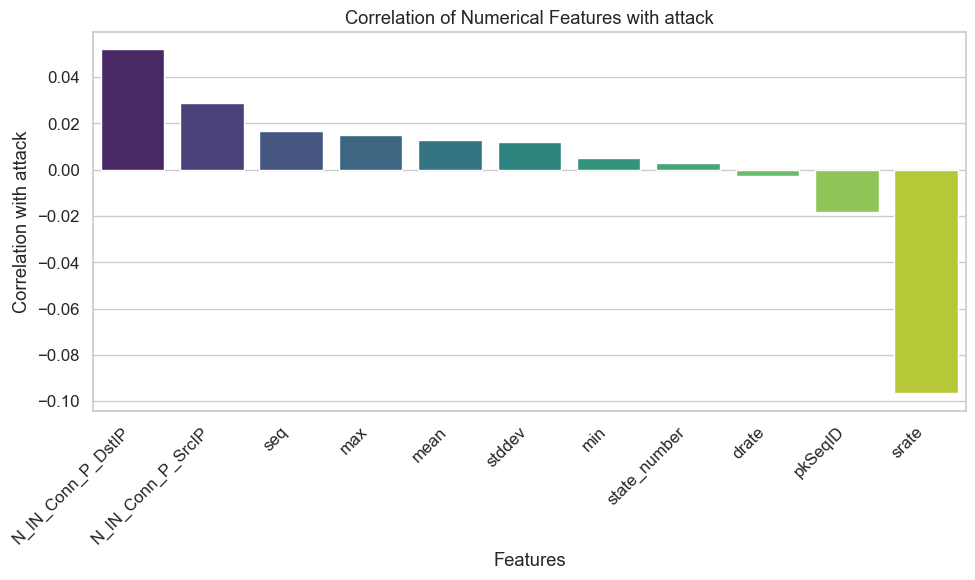

Correlation Coefficients:
N_IN_Conn_P_DstIP    0.052049
N_IN_Conn_P_SrcIP    0.028637
seq                  0.016659
max                  0.015015
mean                 0.012848
stddev               0.011872
min                  0.005226
state_number         0.002701
drate               -0.002730
pkSeqID             -0.018480
srate               -0.096710
Name: attack, dtype: float64


In [8]:
#  Cell 7: Visualize Target Variable Distribution

target_column = 'attack'

# Identify all numeric features and remove the target from this list
numeric_features = data_train.select_dtypes(include=[np.number]).columns.tolist()
if target_column in numeric_features:
    numeric_features.remove(target_column)

# Compute the correlations between each numeric feature and the target
# This creates a correlation matrix that includes the target, then drops the target itself.
correlation_with_target = data_train[numeric_features + [target_column]].corr()[target_column].drop(target_column)
correlation_with_target = correlation_with_target.sort_values(ascending=False)

# Plot the correlations as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette="viridis")
plt.ylabel(f"Correlation with {target_column}")
plt.xlabel("Features")
plt.title(f"Correlation of Numerical Features with {target_column}")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

print("Correlation Coefficients:")
print(correlation_with_target)